<a href="https://colab.research.google.com/github/felipeapgodoi/MetodosNumericos2020_3/blob/master/C%C3%B3pia_de_C%C3%B3pia_de_C%C3%B3pia_de_C%C3%B3pia_de_ComparaMetodosDeSolucao_FelipeGodoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import numpy.linalg as npla
import time
import matplotlib.pyplot as plt

In [32]:
!git clone https://github.com/felipeapgodoi/MetodosNumericos2020_3 #clonar do Github
%cd MetodosNumericos2020_3

Cloning into 'MetodosNumericos2020_3'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 106 (delta 55), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (106/106), 129.60 KiB | 834.00 KiB/s, done.
Resolving deltas: 100% (55/55), done.
/content/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3


In [33]:
from GaussPivot import gauss
from GaussSeidel import gauss_seidel
from Jacobi import jacobi
from SOR import SOR


/content/MetodosNumericos2020_3/GaussSeidel.py:40: RuntimeWarning: overflow encountered in double_scalars
  x_new[i] = (f[i]-sum1-sum2)/A[i,i]
/content/MetodosNumericos2020_3/GaussSeidel.py:35: RuntimeWarning: invalid value encountered in double_scalars
  sum1 += A[i,j]*x_new[j]
/content/MetodosNumericos2020_3/GaussSeidel.py:38: RuntimeWarning: overflow encountered in double_scalars
  sum2 += A[i,j]*x[j]
/content/MetodosNumericos2020_3/SOR.py:43: RuntimeWarning: overflow encountered in double_scalars
  x_new[i] = omega*x_new[i]+(1-omega)*x[i]
/content/MetodosNumericos2020_3/SOR.py:43: RuntimeWarning: invalid value encountered in double_scalars
  x_new[i] = omega*x_new[i]+(1-omega)*x[i]
/content/MetodosNumericos2020_3/SOR.py:41: RuntimeWarning: overflow encountered in double_scalars
  x_new[i] = (f[i]-sum1-sum2)/A[i,i]
/content/MetodosNumericos2020_3/GaussSeidel.py:35: RuntimeWarning: overflow encountered in double_scalars
  sum1 += A[i,j]*x_new[j]
/content/MetodosNumericos2020_3/SOR.py

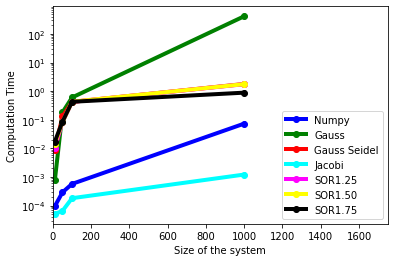

In [34]:
# size of the matrix to be calculated
SIZE = [10,50,100,1000]

# create list
cpu_time_numpy = []
cpu_time_eliminacaodegauss = []
cpu_time_gaussseidel = []
cpu_time_jacobi = []
cpu_time_SOR125 = []
cpu_time_SOR150 = []
cpu_time_SOR175 = []

# loop over the size
for size in SIZE :
  # create the system
  A = np.random.rand(size,size)
  f = np.random.rand(size)
  # nummpy
  t0 = time.clock()
  w=npla.solve(A,f)
  cpu_time_numpy.append(time.clock()-t0)

  # mycodeeliminacaodegauss
  t0 = time.clock()
  x= gauss(A,f)
  cpu_time_eliminacaodegauss.append(time.clock()-t0)

  # mycodegaussseidel
  t0 = time.clock()
  x0= np.random.rand(size)
  y = gauss_seidel(A,f,x0)
  cpu_time_gaussseidel.append(time.clock()-t0)

  # mycodejacobi
  t0 = time.clock()
  z = jacobi(A,f,x)
  cpu_time_jacobi.append(time.clock()-t0)

  # mycodesor1
  t0 = time.clock()
  x0= np.random.rand(size)
  omega=1.25
  x = SOR(A,f,x0,omega)
  cpu_time_SOR125.append(time.clock()-t0)

  # mycodesor2
  t0 = time.clock()
  x0= np.random.rand(size)
  omega=1.5
  x = SOR(A,f,x0,omega)
  cpu_time_SOR150.append(time.clock()-t0)

  # mycodesor3
  t0 = time.clock()
  x0= np.random.rand(size)
  omega=1.75
  x = SOR(A,f,x0,omega)
  cpu_time_SOR175.append(time.clock()-t0)

# plot the results
plt.semilogy(SIZE,cpu_time_numpy,'o-',linewidth=4, color='blue',label='Numpy')
plt.semilogy(SIZE,cpu_time_eliminacaodegauss,'o-',linewidth=4, color='green',label='Gauss')
plt.semilogy(SIZE,cpu_time_gaussseidel,'o-',linewidth=4, color='red',label='Gauss Seidel')
plt.semilogy(SIZE,cpu_time_jacobi,'o-',linewidth=4, color='cyan',label='Jacobi')
plt.semilogy(SIZE,cpu_time_SOR125,'o-',linewidth=4, color='magenta',label='SOR1.25')
plt.semilogy(SIZE,cpu_time_SOR150,'o-',linewidth=4, color='yellow',label='SOR1.50')
plt.semilogy(SIZE,cpu_time_SOR175,'o-',linewidth=4, color='black',label='SOR1.75')

plt.xlabel('Size of the system'  )
plt.ylabel('Computation Time')
plt.xlim([0,1750])
plt.legend(loc=4)
plt.show()

In [35]:
print (cpu_time_numpy)
print(cpu_time_eliminacaodegauss)
print(cpu_time_gaussseidel)
print(cpu_time_jacobi)
print(cpu_time_SOR125)
print(cpu_time_SOR150)
print(cpu_time_SOR175)

[9.499999999817987e-05, 0.0002899999999996794, 0.0005710000000007653, 0.07342799999999983]
[0.0007559999999990907, 0.18071299999999724, 0.601578, 417.336099]
[0.008983999999998105, 0.1301950000000005, 0.42100500000000096, 1.7904359999999997]
[5.099999999913507e-05, 6.49999999993156e-05, 0.000181000000001319, 0.0012139999999476458]
[0.010116999999997489, 0.08410699999999949, 0.4236830000000005, 1.7521989999999619]
[0.014305000000000234, 0.08352299999999957, 0.42941199999999924, 1.7598350000000096]
[0.01724800000000215, 0.08546400000000176, 0.4259850000000007, 0.8880649999999832]


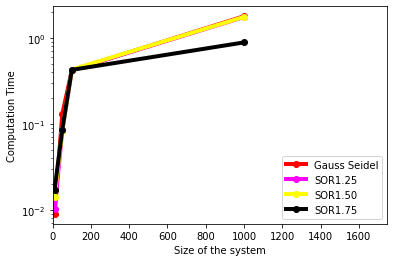

In [36]:
plt.semilogy(SIZE,cpu_time_gaussseidel,'o-',linewidth=4, color='red',label='Gauss Seidel')
plt.semilogy(SIZE,cpu_time_SOR125,'o-',linewidth=4, color='magenta',label='SOR1.25')
plt.semilogy(SIZE,cpu_time_SOR150,'o-',linewidth=4, color='yellow',label='SOR1.50')
plt.semilogy(SIZE,cpu_time_SOR175,'o-',linewidth=4, color='black',label='SOR1.75')

plt.xlabel('Size of the system'  )
plt.ylabel('Computation Time')
plt.xlim([0,1750])
plt.legend(loc=4)
plt.show()